<a href="https://colab.research.google.com/github/Kuangfa/musical-potato/blob/master/gnn_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18068014621061987090, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7648504379043067108
 physical_device_desc: "device: XLA_CPU device"]

In [2]:
a = 1
print(a)

1


In [4]:
!ls


sample_data


In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145118 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.17-0ubuntu2~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.17-0ubuntu2~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.17-0ubuntu2~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive


In [0]:
!mkdir colab


In [4]:
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16228128612842882102, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1843056000651545307
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7173357854280206203
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14912199066
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4328018476724877396
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [5]:
!ls

adc.json  colab  drive	sample_data


上传图片


In [6]:
from google.colab import files
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving guohua-014.jpg to guohua-014.jpg
User uploaded file "guohua-014.jpg" with length 86187 bytes


In [0]:
from google.colab import files
 
with open('example.txt', 'w') as f:
  f.write('some content')
 
files.download('example.txt')

In [0]:
!pip install -q keras

In [9]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 19s 314us/step - loss: 0.2629 - acc: 0.9177 - val_loss: 0.0540 - val_acc: 0.9819
Epoch 2/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0887 - acc: 0.9739 - val_loss: 0.0405 - val_acc: 0.9864
Epoch 3/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0636 - acc: 0.9812 - val_loss: 0.0341 - val_acc: 0.9886
Epoch 4/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0556 - acc: 0.9833 - val_loss: 0.0315 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============

1.15.0
Instructions for updating:
Use tf.gfile.GFile.
<class 'bytes'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'numpy.ndarray'>
(546, 820, 3)
uint8


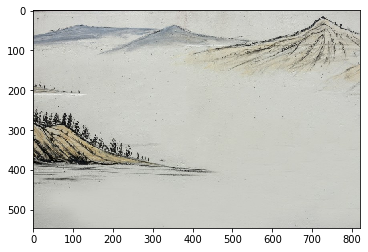

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from google.colab import files
 
print(tf.__version__)
 
#with open('/content/guohua-014.jpg', 'r') as f:
#  f.write('Hello Google Drive!')
 
image_raw = tf.gfile.FastGFile('/content/guohua-014.jpg','rb').read()   #bytes
#image_raw = tf.gfile.FastGFile('颜值.png','rb').read()  
img = tf.image.decode_jpeg(image_raw)  #Tensor
#img2 = tf.image.convert_image_dtype(img, dtype = tf.uint8)
 
with tf.Session() as sess:
    print(type(image_raw)) # bytes
    print(type(img)) # Tensor
    #print(type(img2))
 
    print(type(img.eval())) # ndarray !!!
    print(img.eval().shape)
    print(img.eval().dtype)
 
#    print(type(img2.eval()))
#    print(img2.eval().shape)
#    print(img2.eval().dtype)
    plt.figure(1)
    plt.imshow(img.eval())
    plt.show()

In [22]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 127kB/s 
     |████████████████████████████████| 491kB 48.5MB/s 
     |████████████████████████████████| 3.2MB 40.6MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


1.14.0
(60000, 28, 28, 1)
...........................................................................................................................................................................................................................................

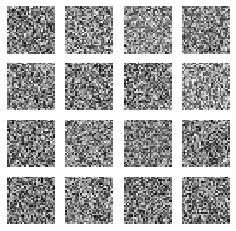

...........................................................................................................................................................................................................................................

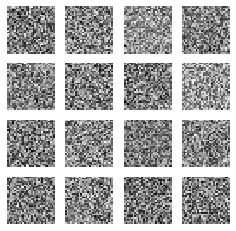

...........................................................................................................................................................................................................................................

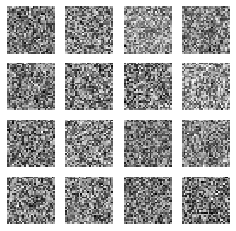

...........................................................................................................................................................................................................................................

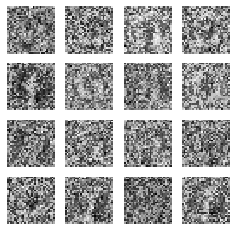

...........................................................................................................................................................................................................................................

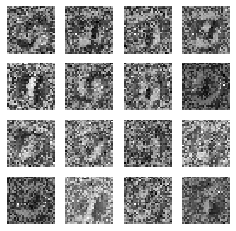

...........................................................................................................................................................................................................................................

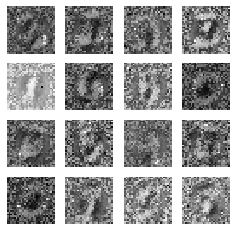

...........................................................................................................................................................................................................................................

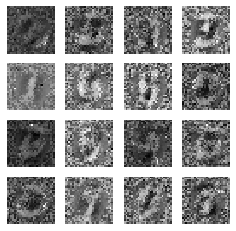

...........................................................................................................................................................................................................................................

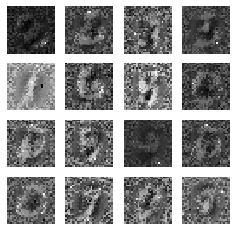

...........................................................................................................................................................................................................................................

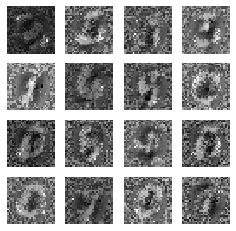

...........................................................................................................................................................................................................................................

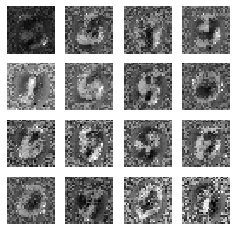

..........................................................................................................................

In [0]:
#-*-encoding:utf-8-*-
"""
# @File : gan.py?
# @Time : 2020/3/7 11:33?
# @Author : xx
# @Software: PyCharm
"""
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

print(tf.__version__)
tf.enable_eager_execution()

(train_images,train_labels),(_,_)=tf.keras.datasets.mnist.load_data()
train_images=train_images.reshape(train_images.shape[0],28,28,1).astype('float32')
print(train_images.shape)

train_images=(train_images-127.5)/127.5
datasets=tf.data.Dataset.from_tensor_slices(train_images)


def generator_model():
    model = keras.Sequential()
    model.add(layers.Dense(256, input_shape=(100,), use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(512, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(28 * 28 * 1, use_bias=False, activation='tanh'))
    model.add(layers.BatchNormalization())

    model.add(layers.Reshape((28, 28, 1)))

    return model


def discriminator_model():
    model = keras.Sequential()
    model.add(layers.Flatten())

    model.add(layers.Dense(512, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(256, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(1))
    return model
cross_entropy=tf.keras.losses.BinaryCrossentropy(from_logits=True)
def discriminator_loss(real_out,fake_out):
    real_loss=cross_entropy(tf.ones_like(real_out),real_out)
    fake_loss=cross_entropy(tf.zeros_like(fake_out),fake_out)
    return real_loss+fake_loss
def generator_loss(fake_out):
    fake_loss=cross_entropy(tf.ones_like(fake_out),fake_out)
    return fake_loss

generator_opt=tf.keras.optimizers.Adam(1e-4)
discriminator_opt=tf.keras.optimizers.Adam(1e-4)
BATCH_SIZE=256
BUFFER_SIZE=60000
datasets=datasets.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
# datasets
EPOCHS=100
noise_dim=100
num_exp_to_generate=16
seed=tf.random.normal([num_exp_to_generate,noise_dim])

discriminator=discriminator_model()
generator=generator_model()


def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        real_out = discriminator(images, training=True)
        gen_image = generator(noise, training=True)
        fake_out = discriminator(gen_image, training=True)

        gen_loss = generator_loss(fake_out)
        disc_loss = discriminator_loss(real_out, fake_out)

    gradient_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradient_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    generator_opt.apply_gradients(zip(gradient_gen, generator.trainable_variables))
    discriminator_opt.apply_gradients(zip(gradient_disc, discriminator.trainable_variables))

def generate_plot_image(gen_model,test_noise):
    pre_images=gen_model(test_noise,training=False)
    fig=plt.figure(figsize=(4,4))
    for i in range(pre_images.shape[0]):
        plt.subplot(4,4,i+1)
        plt.imshow((pre_images[i,:,:,0]+1)/2,cmap='gray')
        plt.axis('off')
    plt.show()


def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)
            print(".", end="")
        generate_plot_image(generator, seed)
train(datasets, EPOCHS)
# print(datasets)

In [27]:
print(tf.__version__)


1.15.0


In [0]:
(train_images,train_labels),(_,_)=tf.keras.datasets.mnist.load_data()